In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Video 1 

In [2]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=d4af333dc5e227e403433745b2c2ea51469ea90265b5b88d507dc5b9d6dae80b
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [3]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
model = SentenceTransformer('nikcheerla/nooks-amd-detection-realtime')

In [5]:
sentences = [
    'I love you very much',
    'You are a nice person, I will always support you',
    'Such a bad guy, the one should be killed'
]

embeddings = model.encode(sentences)
embeddings.shape

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(3, 768)

In [6]:
scores = cos_sim(embeddings[-1], embeddings[:-1])
scores 

tensor([[0.0051, 0.0162]])

In [7]:
sentences[scores.argmax()]

'You are a nice person, I will always support you'

In [8]:
from transformers import DPRContextEncoderTokenizer, DPRContextEncoder, DPRQuestionEncoderTokenizer, DPRQuestionEncoder

In [9]:
ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

qst_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
qst_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.


In [10]:
questions = [
    'what is the capital city of australia?',
    'what is the best selling sci-fi book?',
    'how many searchers are performed on Google?'
]

contexts = [
    'canberra is the capital city of australia',
    'what is the capital city of australia?',
    'the capital city of france is paris',
    'what is the best selling sci-fi book?',
    'sci-fi is a popular book genre read by millions',
    'the best-selling sci-fi book is dune',
    'how many searchers are performed on Google?',
    'Google serves more than 2 trillion queries annually',
    'Google is a popular search engine'
]

In [11]:
xb_tokens = ctx_tokenizer(contexts, max_length=256, padding='max_length', return_tensors='pt')
xb = ctx_model(**xb_tokens)

xq_tokens = qst_tokenizer(questions, max_length=256, padding='max_length', return_tensors='pt')
xq = qst_model(**xq_tokens)

In [12]:
xq.keys()

odict_keys(['pooler_output'])

In [13]:
xq.pooler_output.shape, xb.pooler_output.shape

(torch.Size([3, 768]), torch.Size([9, 768]))

In [14]:
import torch 

for i, xq_vec in enumerate(xq.pooler_output):
    probs = cos_sim(xq_vec, xb.pooler_output)
    print(probs)
    argmax = torch.argmax(probs)
    print(questions[i])
    print(contexts[argmax])
    print('-----------------')

tensor([[0.7273, 0.6480, 0.5451, 0.3971, 0.4172, 0.4579, 0.4380, 0.3978, 0.4438]],
       grad_fn=<MmBackward0>)
what is the capital city of australia?
canberra is the capital city of australia
-----------------
tensor([[0.4009, 0.4262, 0.4236, 0.6245, 0.6770, 0.7017, 0.4601, 0.4309, 0.4551]],
       grad_fn=<MmBackward0>)
what is the best selling sci-fi book?
the best-selling sci-fi book is dune
-----------------
tensor([[0.3892, 0.4398, 0.3732, 0.4445, 0.4565, 0.4325, 0.6976, 0.6568, 0.6116]],
       grad_fn=<MmBackward0>)
how many searchers are performed on Google?
how many searchers are performed on Google?
-----------------


In [15]:
from transformers import CLIPProcessor, CLIPModel

In [16]:
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

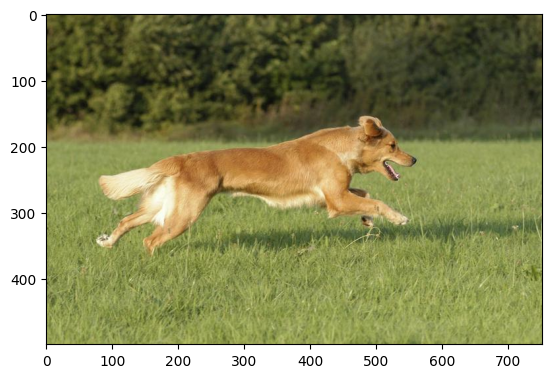

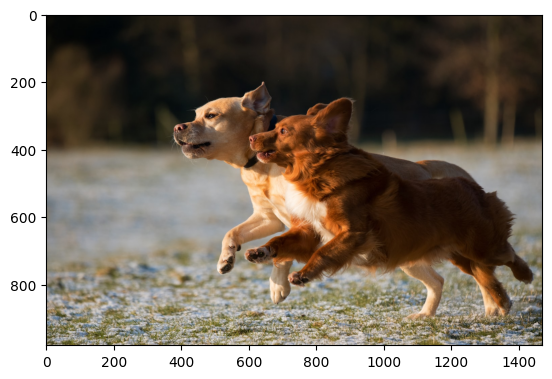

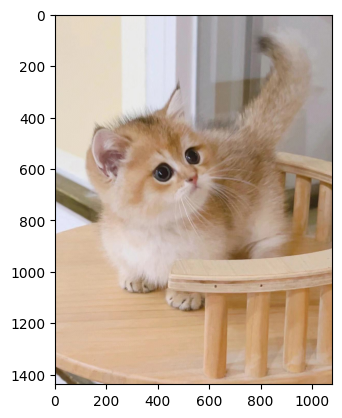

In [17]:
from PIL import Image 
import requests
import matplotlib.pyplot as plt 

urls = [
    'https://img1.baidu.com/it/u=1585343194,947032129&fm=253&fmt=auto&app=138&f=JPEG?w=752&h=500',
    'https://images.unsplash.com/photo-1520580413066-ac45756bdc71?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80',
    'https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fsafe-img.xhscdn.com%2Fbw1%2F34fc045e-0952-4cb8-861c-6f9936449ec6%3FimageView2%2F2%2Fw%2F1080%2Fformat%2Fjpg&refer=http%3A%2F%2Fsafe-img.xhscdn.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1686214087&t=7c1514973e4a23de46e456b707341328'
]

images = [Image.open(requests.get(url, stream=True).raw) for url in urls]

for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [18]:
captions = [
    'a dog hiding behind a tree',
    'two dogs running',
    'a cat smiling',
    'a cucumber on a tree',
    'trees in the park',
    'a cucumber dog'
]

In [19]:
inputs = processor(text=captions, images=images, return_tensors='pt', padding=True)

In [20]:
outputs = model(**inputs)
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[19.2328, 30.0012, 18.1882, 13.3351, 15.8148, 22.3411],
        [18.2720, 32.2161, 16.3880, 12.9403, 16.1294, 20.3281],
        [16.9003, 15.6202, 26.0612, 17.4241, 11.8066, 18.2084]],
       grad_fn=<TBackward0>), logits_per_text=tensor([[19.2328, 18.2720, 16.9003],
        [30.0012, 32.2161, 15.6202],
        [18.1882, 16.3880, 26.0612],
        [13.3351, 12.9403, 17.4241],
        [15.8148, 16.1294, 11.8066],
        [22.3411, 20.3281, 18.2084]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0146,  0.0180, -0.0234,  ..., -0.0266, -0.0500,  0.0710],
        [ 0.0117, -0.0137, -0.0734,  ..., -0.0049,  0.0094, -0.0250],
        [-0.0029, -0.0046, -0.0383,  ..., -0.0348, -0.0387,  0.0057],
        [ 0.0334,  0.0516,  0.0420,  ...,  0.0053, -0.0176,  0.0114],
        [ 0.0033,  0.0463,  0.0084,  ..., -0.0199, -0.0736,  0.0331],
        [ 0.0221, -0.0102,  0.0247,  ...,  0.0010, -0.0203,  0.0188]],
       grad_fn=<DivBackward0>), image_emb

In [21]:
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [22]:
probs = outputs.logits_per_image.argmax(dim=1)
probs

tensor([1, 1, 2])

two dogs running


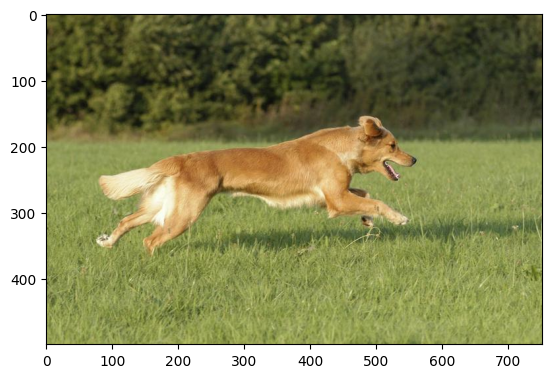

two dogs running


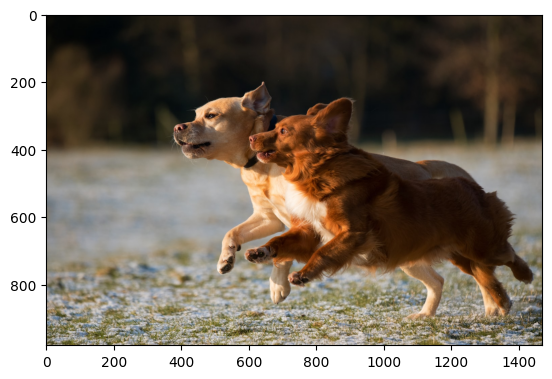

a cat smiling


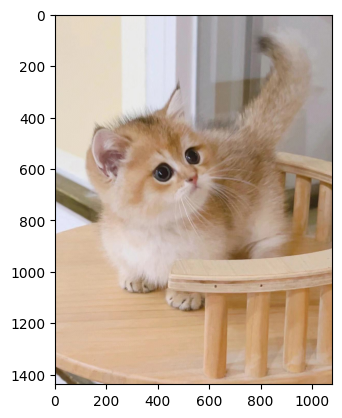

In [23]:
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(captions[argmax])
    plt.show(plt.imshow(np.asarray(image)))

In [24]:
outputs.text_embeds.shape, outputs.image_embeds.shape

(torch.Size([6, 512]), torch.Size([3, 512]))

In [25]:
xq = outputs.text_embeds[0] 
xb = outputs.image_embeds

In [26]:
sim = cos_sim(xq, xb)
sim

tensor([[0.1923, 0.1827, 0.1690]], grad_fn=<MmBackward0>)

## Video 2

In [27]:
model = SentenceTransformer('nikcheerla/nooks-amd-detection-realtime')

In [28]:
sentences = [
    'I love you very much',
    'You are a nice person, I will always support you',
    'Such a bad guy, the one should be killed',
    'My favourite food is tofu',
    'I want to study in Standford University'
]

In [29]:
embeddings = model.encode(sentences)
embeddings.shape

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(5, 768)

In [30]:
sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])
    
sim

array([[ 0.99999982,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.91369164,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00505489,  0.01624349,  1.        ,  0.        ,  0.        ],
       [ 0.88703221,  0.91983652, -0.04618707,  1.00000012,  0.        ],
       [ 0.88418549,  0.96136463, -0.0167969 ,  0.94498628,  0.99999994]])

<AxesSubplot: >

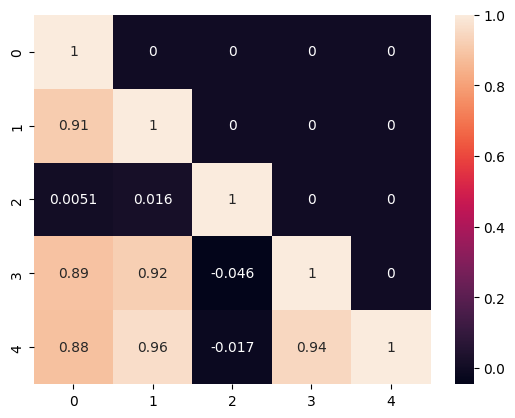

In [31]:
import seaborn as sns 

sns.heatmap(sim, annot=True)

## Video 3

In [32]:
import datasets

In [33]:
snli = datasets.load_dataset('snli', split='train')

Downloading:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Dataset snli downloaded and prepared to /root/.cache/huggingface/datasets/snli/plain_text/1.0.0/1f60b67533b65ae0275561ff7828aad5ee4282d0e6f844fd148d05d3c6ea251b. Subsequent calls will reuse this data.


In [34]:
snli[0]

{'premise': 'A person on a horse jumps over a broken down airplane.',
 'hypothesis': 'A person is training his horse for a competition.',
 'label': 1}

In [35]:
mnli = datasets.load_dataset('glue', 'mnli', split='train')
mnli

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Dataset({
    features: ['premise', 'hypothesis', 'label', 'idx'],
    num_rows: 392702
})

In [36]:
mnli = mnli.remove_columns(['idx'])
mnli

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 392702
})

In [37]:
snli = snli.cast(mnli.features)

Casting the dataset:   0%|          | 0/56 [00:00<?, ?ba/s]

In [38]:
dataset = datasets.concatenate_datasets([mnli, snli])

In [39]:
dataset

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 942854
})

In [40]:
dataset = dataset.filter(
    lambda x: False if x['label'] == -1 else True
)
dataset

  0%|          | 0/943 [00:00<?, ?ba/s]

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 942069
})

In [41]:
from transformers import BertTokenizer, BertModel 

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
all_cols = ['label']

for part in ['premise', 'hypothesis']:
    dataset = dataset.map(
        lambda x: tokenizer(x[part], max_length=128, padding='max_length', truncation=True), batched=True
    )
    for col in ['input_ids', 'attention_mask']:
        dataset = dataset.rename_column(
            col, part + '_' + col
        )
        all_cols.append(part + '_' + col)
print(all_cols)

  0%|          | 0/943 [00:00<?, ?ba/s]

  0%|          | 0/943 [00:00<?, ?ba/s]

['label', 'premise_input_ids', 'premise_attention_mask', 'hypothesis_input_ids', 'hypothesis_attention_mask']


In [43]:
dataset.set_format(type='torch', columns=all_cols)

In [44]:
batch_size = 32 

loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [45]:
dataset[0].keys()

dict_keys(['label', 'premise_input_ids', 'premise_attention_mask', 'hypothesis_input_ids', 'hypothesis_attention_mask'])

In [46]:
outputs_a = model(
    dataset[:1]['premise_input_ids'],
    attention_mask=dataset[:1]['premise_attention_mask']
)

outputs_a.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [47]:
outputs_a.pooler_output.shape

torch.Size([1, 768])

In [48]:
cos_sim = torch.nn.CosineSimilarity() 

outputs_b = model(
    dataset[:1]['hypothesis_input_ids'],
    attention_mask=dataset[:1]['hypothesis_attention_mask']
)

cos_sim(outputs_a.pooler_output, outputs_b.pooler_output)

tensor([0.4046], grad_fn=<SumBackward1>)

In [49]:
def mean_pool(token_embeds, attention_mask):
    in_mask = attention_mask.unsqueeze(-1).expand(token_embeds.size()).float()
    pool = torch.sum(token_embeds * in_mask, 1) / torch.clamp(in_mask.sum(1), min=1e-9)
    return pool

In [50]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [51]:
ffnn = torch.nn.Linear(768 * 3, 3)
loss_func = torch.nn.CrossEntropyLoss() 
ffnn.to(device)
loss_func.to(device)

CrossEntropyLoss()

In [52]:
from transformers.optimization import get_linear_schedule_with_warmup 
from transformers import AdamW 

optim = AdamW(model.parameters(), lr=5e-5)
epochs = 1

total_steps = int(len(dataset)/ batch_size)
warmup_steps = int(0.1 * total_steps * epochs)
schedular = get_linear_schedule_with_warmup(
    optim, num_warmup_steps=warmup_steps,
    num_training_steps=total_steps - warmup_steps
)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [53]:
from tqdm import tqdm 

for epoch in range(epochs):
    model.train() 
    loop = tqdm(loader, leave=True)
    for batch in loop:
        optim.zero_grad() 
        inputs_ids_a = batch['premise_input_ids'].to(device)
        inputs_ids_b = batch['hypothesis_input_ids'].to(device)
        attention_a = batch['premise_attention_mask'].to(device)
        attention_b = batch['hypothesis_attention_mask'].to(device)
        label = batch['label'].to(device)
        
        u = model(inputs_ids_a, attention_mask=attention_a)[0]
        v = model(inputs_ids_b, attention_mask=attention_b)[0]
        
        u = mean_pool(u, attention_a)
        v = mean_pool(v, attention_b)
        uv_abs = torch.abs(u - v)
        
        x = torch.cat([u, v, uv_abs], dim=-1)
        x = ffnn(x)
        loss = loss_func(x, label)
        
        loss.backward() 
        torch.nn.utils.clip_grad_norm_(loss_func.parameters(), 1)
        optim.step()
        
        loop.set_description(f'Epoch {epoch + 1}')
        loop.set_postfix(loss=loss.item())

Epoch 1:   0%|          | 13/29440 [00:20<12:40:27,  1.55s/it, loss=1.11]


KeyboardInterrupt: 

In [54]:
import os 

model_path = 'model1'

if not os.path.exists(model_path):
    os.mkdir(model_path)
    
model.save_pretrained(model_path)

In [55]:
from sentence_transformers import InputExample

In [56]:
snli = datasets.load_dataset('snli', split='train')
mnli = datasets.load_dataset('glue', 'mnli', split='train')
mnli = mnli.remove_columns(['idx'])
snli = snli.cast(mnli.features)
dataset = datasets.concatenate_datasets([mnli, snli])
dataset = dataset.filter(
    lambda x: False if x['label'] == -1 else True
)

Casting the dataset:   0%|          | 0/56 [00:00<?, ?ba/s]

  0%|          | 0/943 [00:00<?, ?ba/s]

In [57]:
from tqdm import tqdm 

train_samples = []
for row in tqdm(dataset):
    train_samples.append(InputExample(texts=[row['premise'], row['hypothesis']], label=row['label']))

100%|██████████| 942069/942069 [01:17<00:00, 12137.42it/s]


In [58]:
batch_size = 32 

loader = torch.utils.data.DataLoader(train_samples, batch_size=batch_size, shuffle=True)

In [59]:
from sentence_transformers import models 

bert = models.Transformer('bert-base-uncased')
pooler = models.Pooling(bert.get_word_embedding_dimension(), pooling_mode_mean_tokens=True)

model = SentenceTransformer(modules=[bert, pooler])
model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [60]:
from sentence_transformers import losses

loss = losses.SoftmaxLoss(
    model=model, 
    sentence_embedding_dimension=model.get_sentence_embedding_dimension(), 
    num_labels=3
)

In [61]:
epochs = 1 
warmup_steps = int(0.1 * len(dataset))

model.fit(
    train_objectives=[(loader, loss)],
    epochs=epochs,
    warmup_steps=warmup_steps,
    output_path='model2',
#     show_progress_bar=False
)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/29440 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [62]:
sentences = [
    'the fifty mannequin heads floating in the pool kind of freaked them out',
    'she swore she just saw her sushi move',
    'he embraced his new life as an eggplant',
    'my dentist tells me that chewing bricks is very bad for your teeth',
    'the dental specialist recommended an immediate stop to flossing with construction materials',
    'i used to practice weaving with spaghetti three hours a day',
    'the white water rafting trip was suddenly halted by the unexpected brick wall',
    'the person would knit using noodles for a few hours daily',
    'it was always dangerous to drive with him since he insisted the safety cones were a slalom course',
    'the woman thinks she saw her raw fish and rice change position'
]

In [63]:
embeddings = model.encode(sentences)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [65]:
def sts_process(sentence_a, sentence_b, model):
    vecs = []
    for sentence in [sentence_a, sentence_b]:
        inputs = tokenizer(
            sentence, max_length=512, padding='max_length',
            truncation=True, return_tensors='pt'
        )
        token_embeds = model(**inputs)[0]
        sentence_embeds = mean_pool(token_embeds, inputs['attention_mask'])
        vecs.append(sentence_embeds)
    return cos_sim(vecs[0], vecs[1]).detach().numpy()

In [66]:
def sim_matrix(model):
    sim = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        sim[i:, i] = sts_process(sentences[i], sentences[i:], model)
    return sim

In [67]:
model = BertModel.from_pretrained('model')
sim = sim_matrix(model)
sns.heatmap(sim, annot=True)

OSError: model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `use_auth_token` or log in with `huggingface-cli login` and pass `use_auth_token=True`.